#### Import libraries:

In [101]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
# from PorousMediaLab 
import PorousMediaLab
import numpy as np
%matplotlib inline

In [102]:
help(PorousMediaLab)

Help on module PorousMediaLab:

NAME
    PorousMediaLab - module(name[, doc])

DESCRIPTION
    Create a module object.
    The name must be a string; the optional doc argument can have any type.

CLASSES
    builtins.dict(builtins.object)
        DotDict
    builtins.object
        PorousMediaLab
    
    class DotDict(builtins.dict)
     |  dot.notation access to dictionary attributes
     |  
     |  Method resolution order:
     |      DotDict
     |      builtins.dict
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __delattr__ = __delitem__(self, key, /)
     |      Delete self[key].
     |  
     |  __getattr__ = get(...)
     |      D.get(k[,d]) -> D[k] if k in D, else d.  d defaults to None.
     |  
     |  __setattr__ = __setitem__(self, key, value, /)
     |      Set self[key] to value.
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
   

#### Setting up the properties of time-space and create the domain:

In [103]:
t = 27 / 365
dx = 0.2
L = 40
phi = 0.4
dt = 1e-5
ftc = PorousMediaLab.PorousMediaLab(L, dx, t, dt, phi)

#### Adding species with names, diffusion coefficients, initial concentrations and boundary top and bottom conditions:

In [104]:
ftc.add_species(is_solute=True, element='O2', D=368, init_C=0, bc_top=0.231, bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='CO2', D=320, init_C=0, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='Fe2', D=127, init_C=0, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_solid_species('OM', init_C=15)
ftc.add_solute_species('CO2', D=320, init_C=0)

#### Non-trivial inital conditions for iron:

In [105]:
x = np.linspace(0, L, L / dx + 1)
Fe3_init = np.zeros(x.size)
Fe3_init[x > 5] = 75
Fe3_init[x > 15] = 0
Fe3_init[x > 25] = 75
Fe3_init[x > 35] = 0

ftc.add_solid_species('FeOH3', Fe3_init)

#### Specify the constants used in the rates:

In [106]:
ftc.constants['k_OM'] = 1
ftc.constants['Km_O2'] = 20e-3
ftc.constants['Km_FeOH3'] = 10
ftc.constants['k8'] = 1.4e+5

#### Specify the equations for rates:

In [107]:
ftc.rates['R1'] = 'k_OM * OM * O2 / (Km_O2 + O2)'
ftc.rates['R2'] = 'k_OM * OM * FeOH3 / (Km_FeOH3 + FeOH3) * Km_O2 / (Km_O2 + O2)'
ftc.rates['R8'] = 'k8 * O2 * Fe2'

#### ODEs for specific species:

In [108]:
ftc.dcdt['OM'] = '-R1-R2'
ftc.dcdt['O2'] = '-R1-R8'
ftc.dcdt['FeOH3'] = '-4*R2+R8'
ftc.dcdt['Fe2'] = '-R8+4*R2'
ftc.dcdt['CO2'] = 'R1+R2'

#### Because we are changing the boundary conditions for temperature and Oxygen (when T < 0 => no oxygen at the top), then we need to have a time loop:

In [109]:
# %prun 

In [110]:
ftc.solve()

Simulation starts  with following params:
	tend = 0.1,
	dt = 1.00e-05,
	L = 40.0,
	dx = 2.00e-01,
	w = 0.00
Simulation started:
	 2017-06-02 17:14:48


Estimated time of the code execution:
	 0h:00m:19s
Will finish approx.:
	 2017-06-02 17:15:07


### Concentrations of different species during the whole period of simulation:

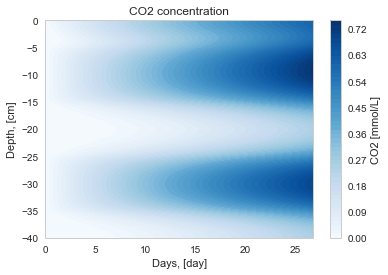

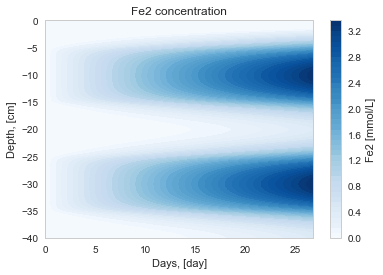

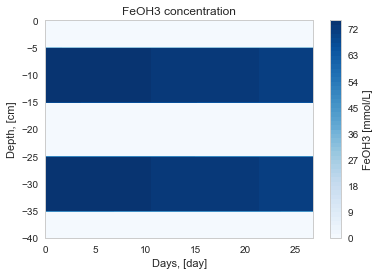

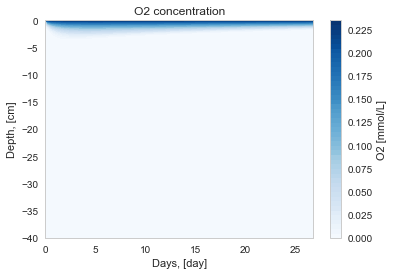

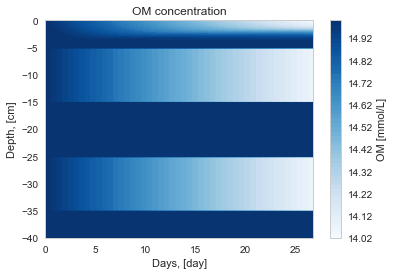

In [111]:
ftc.plot_contourplots()

### The rates of consumption and production of species:

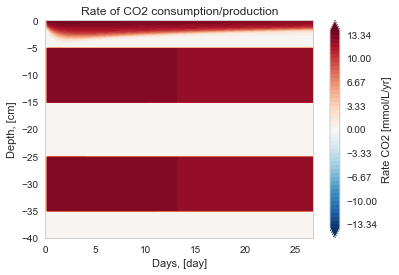

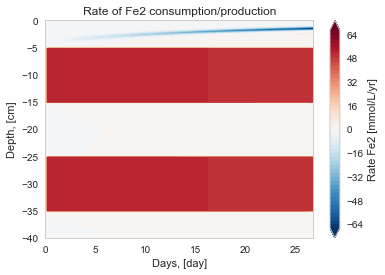

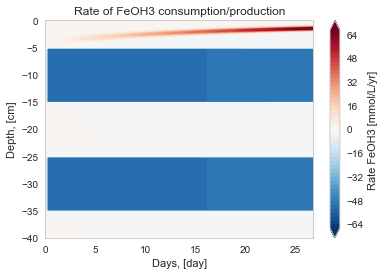

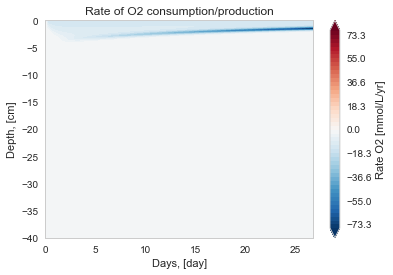

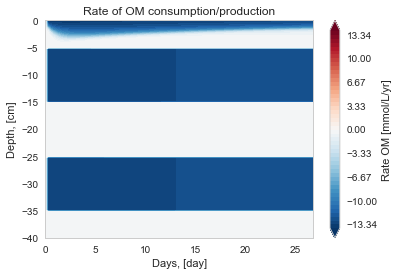

In [112]:
ftc.plot_contourplots_of_rates()

### Profiles at the end of the simulation

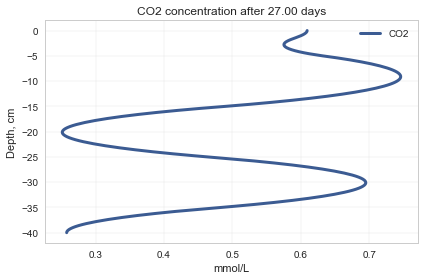

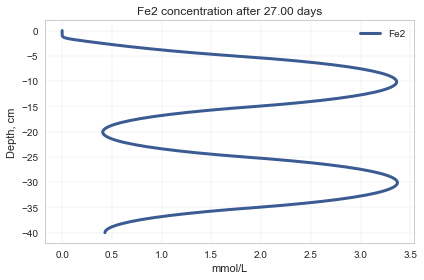

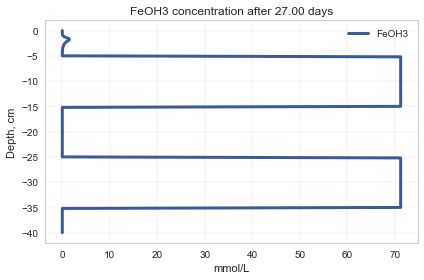

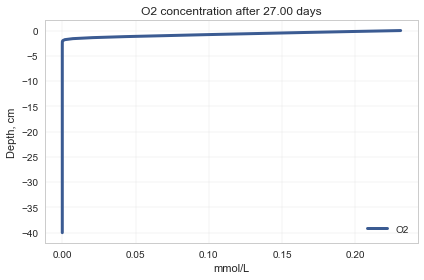

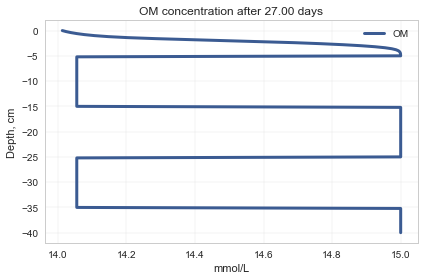

In [113]:
ftc.plot_profiles()

In [114]:
len(ftc.species)

5